In [2]:
using Images
using LinearAlgebra
using MAT
using SparseArrays

┌ Info: Precompiling MAT [23992714-dd62-5051-b70f-ba57cb901cac]
└ @ Base loading.jl:1278


In [3]:
A = rand(10, 10)
AT = A'
A = A * AT
@show A[11] === A[1, 2]

A[11] === A[1, 2] = true


true

In [4]:
b = rand(10)

# Ax = b; will provide least squares solution if no analytical solution
x = A \ b 
@show norm(A*x - b)

norm(A * x - b) = 1.4036310451074658e-14


1.4036310451074658e-14

In [5]:
@show typeof(A)
@show typeof(b)
@show typeof(rand(1, 10))
@show typeof(AT)

typeof(A) = Array{Float64,2}
typeof(b) = Array{Float64,1}
typeof(rand(1, 10)) = Array{Float64,2}
typeof(AT) = Adjoint{Float64,Array{Float64,2}}


Adjoint{Float64,Array{Float64,2}}

In [6]:
Matrix{Float64} == Array{Float64, 2}

true

In [7]:
Vector{Float64} == Array{Float64, 1}

true

In [8]:
AT

10×10 Adjoint{Float64,Array{Float64,2}}:
 0.639994   0.352332  0.646539  0.909064  …  0.62988    0.822812  0.352439
 0.262991   0.163743  0.722892  0.543327     0.0210329  0.496138  0.575005
 0.965179   0.150068  0.438007  0.882102     0.895815   0.291359  0.775775
 0.0661444  0.804985  0.955746  0.180129     0.407976   0.162947  0.23457
 0.570087   0.690623  0.18067   0.755285     0.883107   0.964002  0.588671
 0.158165   0.710691  0.70904   0.541418  …  0.975155   0.869536  0.82426
 0.931192   0.852812  0.589436  0.482559     0.310809   0.836524  0.701629
 0.27144    0.486611  0.207405  0.626535     0.756383   0.152639  0.162612
 0.093921   0.273315  0.381681  0.227651     0.139613   0.108075  0.451147
 0.467272   0.59831   0.638099  0.722069     0.509039   0.628718  0.558043

In [9]:
adjoint(A)

10×10 Adjoint{Float64,Array{Float64,2}}:
 2.93268  2.20422  2.2442   3.0824   …  2.52746  2.70365  2.76049  2.60764
 2.20422  3.20027  2.89964  2.80368     2.72262  2.96699  3.02315  2.65059
 2.2442   2.89964  3.52457  3.02141     2.9853   2.7739   2.93186  2.87388
 3.0824   2.80368  3.02141  3.99436     3.44355  3.66591  3.48068  3.19636
 2.55072  2.90678  3.05476  3.39574     3.51397  3.49991  2.98388  3.19752
 2.81682  3.55854  3.63751  3.83779  …  3.69544  3.3478   3.5672   3.06643
 2.52746  2.72262  2.9853   3.44355     3.91474  3.49866  2.85679  2.93029
 2.70365  2.96699  2.7739   3.66591     3.49866  4.04426  3.26602  3.0365
 2.76049  3.02315  2.93186  3.48068     2.85679  3.26602  3.85004  3.13509
 2.60764  2.65059  2.87388  3.19636     2.93029  3.0365   3.13509  3.1713

In [10]:
sizeof(A) # 100 * 8 bytes

800

In [11]:
luA = lu(A)

LU{Float64,Array{Float64,2}}
L factor:
10×10 Array{Float64,2}:
 1.0        0.0        0.0        0.0        …   0.0       0.0       0.0
 0.715099   1.0        0.0        0.0            0.0       0.0       0.0
 0.728068   0.718087   1.0        0.0            0.0       0.0       0.0
 0.951426  -0.387564  -0.433231   1.0            0.0       0.0       0.0
 0.827511   0.490819   0.241506  -0.118497       0.0       0.0       0.0
 0.913838   0.83358    0.327907  -0.27042    …   0.0       0.0       0.0
 0.819964   0.354454   0.309669  -0.208365       0.0       0.0       0.0
 0.895564   0.42855   -0.114245   0.0842512      1.0       0.0       0.0
 0.877124   0.424824  -0.239532  -0.32832       -0.503104  1.0       0.0
 0.845977   0.233185   0.183237   0.294497       0.399681  0.606831  1.0
U factor:
10×10 Array{Float64,2}:
 3.0824  2.80368  3.02141    3.99436    …   3.66591    3.48068     3.19636
 0.0     1.19535  0.739038  -0.0526767      0.345505   0.53412     0.364875
 0.0     0.0      0.79

In [12]:
norm(luA.L * luA.U - luA.P * A)

1.88411095042053e-15

In [13]:
qrA = qr(A)

LinearAlgebra.QRCompactWY{Float64,Array{Float64,2}}
Q factor:
10×10 LinearAlgebra.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.34914    0.620474     0.133133    …  -0.208244    0.0684106  -0.232244
 -0.262416  -0.525268     0.444061       -0.139313    0.270042    0.42993
 -0.267175  -0.304378    -0.709871       -0.264106    0.090545   -0.173742
 -0.366965   0.339336    -0.106278       -0.16734     0.390063    0.490635
 -0.303667  -0.0961089   -0.0756316       0.0589088   0.274536   -0.355548
 -0.335346  -0.33003      0.00653571  …  -0.0518093  -0.272187   -0.173441
 -0.300898   0.00604901  -0.214316        0.337277    0.0881616   0.16003
 -0.321874  -0.0285937    0.36867        -0.463556   -0.319121   -0.246673
 -0.328641  -0.0251977    0.242617        0.678342    0.118897   -0.28657
 -0.310444   0.108001    -0.152964        0.21102    -0.699176    0.406494
R factor:
10×10 Array{Float64,2}:
 -8.39973  -9.0796  -9.38916   …  -10.3649    -10.0695     -9.41999
  0.0      -1.5566  -1.49698 

In [14]:
norm(qrA.Q * qrA.R - A)

1.4127342602942564e-14

In [15]:
isposdef(A)

true

In [16]:
cholA = cholesky(A)

Cholesky{Float64,Array{Float64,2}}
U factor:
10×10 UpperTriangular{Float64,Array{Float64,2}}:
 1.71251  1.28713  1.31048   1.79994   …   1.57877     1.61196     1.5227
  ⋅       1.2424   0.976245  0.391926      0.752505    0.763317    0.555915
  ⋅        ⋅       0.92421   0.30298      -0.0320976   0.0803285   0.363229
  ⋅        ⋅        ⋅        0.713572      0.755397    0.358414    0.17891
  ⋅        ⋅        ⋅         ⋅            0.305286   -0.249798    0.351931
  ⋅        ⋅        ⋅         ⋅        …  -0.361517   -0.289664   -0.182273
  ⋅        ⋅        ⋅         ⋅            0.353827   -0.0599587  -0.0882074
  ⋅        ⋅        ⋅         ⋅            0.254452   -0.505765   -0.202145
  ⋅        ⋅        ⋅         ⋅             ⋅          0.358288    0.252586
  ⋅        ⋅        ⋅         ⋅             ⋅           ⋅          0.331917

In [17]:
norm(cholA.L * cholA.U - A)

2.6645352591003757e-15

In [18]:
factorize(A)

Cholesky{Float64,Array{Float64,2}}
U factor:
10×10 UpperTriangular{Float64,Array{Float64,2}}:
 1.71251  1.28713  1.31048   1.79994   …   1.57877     1.61196     1.5227
  ⋅       1.2424   0.976245  0.391926      0.752505    0.763317    0.555915
  ⋅        ⋅       0.92421   0.30298      -0.0320976   0.0803285   0.363229
  ⋅        ⋅        ⋅        0.713572      0.755397    0.358414    0.17891
  ⋅        ⋅        ⋅         ⋅            0.305286   -0.249798    0.351931
  ⋅        ⋅        ⋅         ⋅        …  -0.361517   -0.289664   -0.182273
  ⋅        ⋅        ⋅         ⋅            0.353827   -0.0599587  -0.0882074
  ⋅        ⋅        ⋅         ⋅            0.254452   -0.505765   -0.202145
  ⋅        ⋅        ⋅         ⋅             ⋅          0.358288    0.252586
  ⋅        ⋅        ⋅         ⋅             ⋅           ⋅          0.331917

In [19]:
I(3)

3×3 Diagonal{Bool,Array{Bool,1}}:
 1  ⋅  ⋅
 ⋅  1  ⋅
 ⋅  ⋅  1

In [20]:
Diagonal([1, 2, 3])

3×3 Diagonal{Int64,Array{Int64,1}}:
 1  ⋅  ⋅
 ⋅  2  ⋅
 ⋅  ⋅  3

In [34]:
S = sprand(4, 4, 1/5)

4×4 SparseMatrixCSC{Float64,Int64} with 3 stored entries:
  [1, 1]  =  0.860272
  [2, 3]  =  0.289297
  [1, 4]  =  0.0682316

In [35]:
S.rowval

3-element Array{Int64,1}:
 1
 2
 1

In [36]:
Matrix(S)

4×4 Array{Float64,2}:
 0.860272  0.0  0.0       0.0682316
 0.0       0.0  0.289297  0.0
 0.0       0.0  0.0       0.0
 0.0       0.0  0.0       0.0

In [37]:
S.colptr

5-element Array{Int64,1}:
 1
 2
 2
 3
 4

In [39]:
S.nzval

3-element Array{Float64,1}:
 0.8602716104960173
 0.2892970005982207
 0.06823162564876983

In [40]:
S.n, S.m

(4, 4)

In [42]:
FACES = (
    "/Users/dsatterthwaite/repos/scripts-analytics/faces/images/resized")
me = "$FACES/dsatterthwaite.jpg"
me

"/Users/dsatterthwaite/repos/scripts-analytics/faces/images/resized/dsatterthwaite.jpg"

┌ Info: Precompiling QuartzImageIO [dca85d43-d64c-5e67-8c65-017450d5d020]
└ @ Base loading.jl:1278


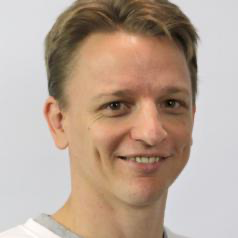

In [44]:
X1 = load(me)

In [46]:
@show typeof(X1)
X1[50, 50] # single pixel

typeof(X1) = Array{RGBX{Normed{UInt8,8}},2}


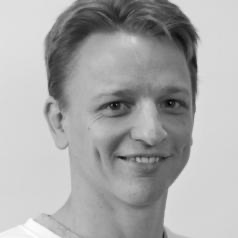

In [48]:
Xgrey = Gray.(X1)

In [53]:
R = map(i -> X1[i].r, 1:length(X1))
R = Float64.(reshape(R, size(X1)...))

G = map(i -> X1[i].g, 1:length(X1))
G = Float64.(reshape(G, size(X1)...))

B = map(i -> X1[i].b, 1:length(X1))
B = Float64.(reshape(B, size(X1)...));

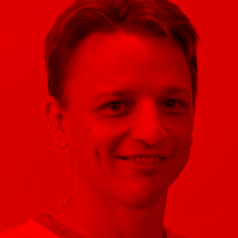

In [55]:
Z = zeros(size(R)...)
RGB.(R, Z, Z)

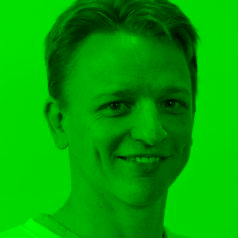

In [56]:
RGB.(Z, G, Z)

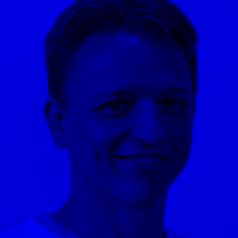

In [57]:
RGB.(Z, Z, B)

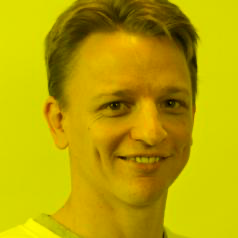

In [58]:
RGB.(R, G, Z)

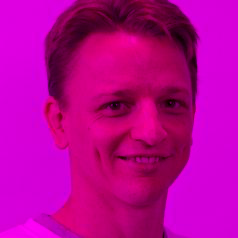

In [59]:
RGB.(R, Z, B)

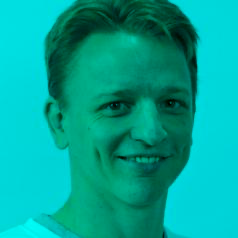

In [60]:
RGB.(Z, G, B)

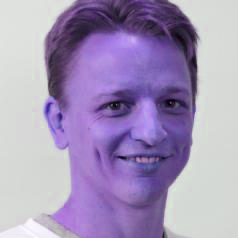

In [61]:
RGB.(G, B, R)

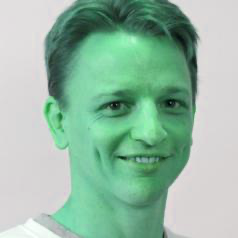

In [62]:
RGB.(B, R, G)

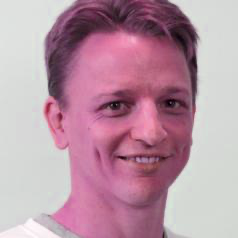

In [63]:
RGB.(R, B, G)

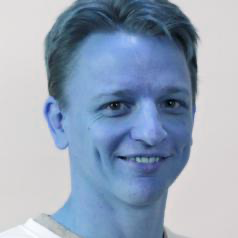

In [64]:
RGB.(B, G, R)

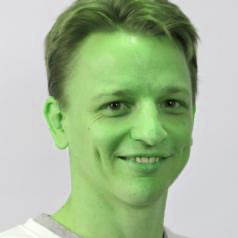

In [65]:
RGB.(G, R, B)

In [67]:
Xgreyfloat = Float64.(Xgrey)

238×238 Array{Float64,2}:
 0.87451   0.87451   0.87451   0.87451   …  0.839216  0.839216  0.839216
 0.87451   0.87451   0.87451   0.87451      0.839216  0.839216  0.839216
 0.87451   0.87451   0.87451   0.87451      0.839216  0.839216  0.839216
 0.87451   0.87451   0.87451   0.87451      0.839216  0.839216  0.839216
 0.87451   0.87451   0.87451   0.87451      0.839216  0.839216  0.839216
 0.87451   0.87451   0.87451   0.87451   …  0.839216  0.839216  0.839216
 0.87451   0.87451   0.87451   0.87451      0.839216  0.839216  0.839216
 0.87451   0.87451   0.87451   0.87451      0.839216  0.839216  0.839216
 0.87451   0.87451   0.87451   0.87451      0.843137  0.843137  0.843137
 0.87451   0.87451   0.87451   0.87451      0.843137  0.843137  0.843137
 0.87451   0.87451   0.87451   0.87451   …  0.843137  0.843137  0.843137
 0.87451   0.87451   0.87451   0.87451      0.843137  0.843137  0.843137
 0.87451   0.87451   0.87451   0.87451      0.843137  0.843137  0.843137
 ⋮                       

In [68]:
SVD_V = svd(Xgreyfloat);

In [70]:
u1 = SVD_V.U[:, 1]
v1 = SVD_V.V[:, 1]
img1 = SVD_V.S[1] * u1 * v1';

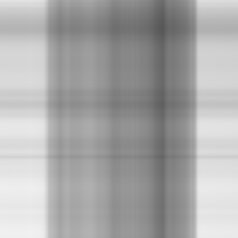

In [71]:
Gray.(img1)

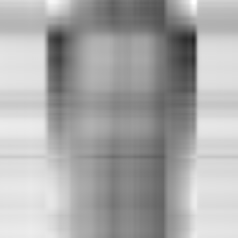

In [72]:
i = 2
u1 = SVD_V.U[:, i]
v1 = SVD_V.V[:, i]
img1 += SVD_V.S[i] * u1 * v1'
Gray.(img1)

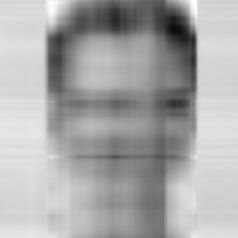

In [73]:
i = 3
u1 = SVD_V.U[:, i]
v1 = SVD_V.V[:, i]
img1 += SVD_V.S[i] * u1 * v1'
Gray.(img1)

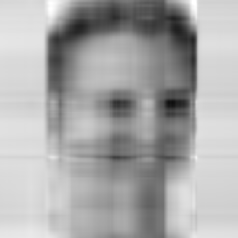

In [74]:
i = 4
u1 = SVD_V.U[:, i]
v1 = SVD_V.V[:, i]
img1 += SVD_V.S[i] * u1 * v1'
Gray.(img1)

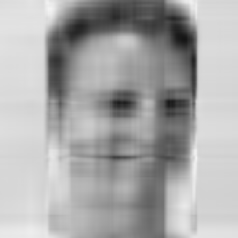

In [75]:
i = 5
u1 = SVD_V.U[:, i]
v1 = SVD_V.V[:, i]
img1 += SVD_V.S[i] * u1 * v1'
Gray.(img1)

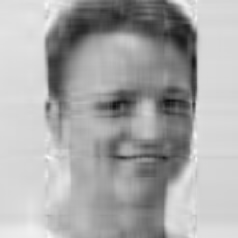

In [77]:
for i = 6:10
    u1 = SVD_V.U[:, i]
    v1 = SVD_V.V[:, i]
    img1 += SVD_V.S[i] * u1 * v1'
end
Gray.(img1)

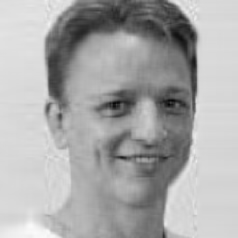

In [78]:
for i = 11:20
    u1 = SVD_V.U[:, i]
    v1 = SVD_V.V[:, i]
    img1 += SVD_V.S[i] * u1 * v1'
end
Gray.(img1)